# Percolation - group 0

By Alexia Anastasiadou, Edward Bickerton, Omiros Typatsas and Rachel Wood

# Introduction

Percolation refers to simplified lattice models of random systems or graphs. It can be used to model fluids travelling through porous materials.

In this project we first investigate the square grid $\{0,\ldots,n-1\}^2=\{(i,j):i,j\in\{0,\ldots,n-1\}\}$ with elements called sites each yellow with probability $p$ and blue with probability $1-p$ where $p\in[0,1]$, we want to find the probability that there is a yellow path connecting the left and right sides of the grid for different values of $n$ and $p$.

Two sites are considered adjacent if they are Euclidean distance exactly 1, so each site is adjacent to at most 4 others (but fewer if it is at a side or corner of the grid). A path means a finite sequence of sites in which each consecutive pair is adjacent. For the first 3 questions we are interested in, $F_n(p)$ the probability that there is a yellow path connecting the left and right sides of the grid. 
Further on, we look at $F(p)$, the value $lim_{n\to\infty}F{_n}(p)$, which is zero if $p<p_c$ and one if $p>p_c$ where $p_c$ is the critical point.

We then go on and examine the triangular lattice, which consists of sites at the corners of equilateral triangles, with 6 triangles meeting at each site.

# 1: Square Lattices

## 1.1 Producing a visualisation of the randomly coloured grid

In [1]:
# We start by importing some useful libraries and set our colour scheme moving forward
import numpy as np
from random import *
import pylab
import matplotlib.pyplot as plt
from matplotlib import colors

colours = colors.ListedColormap(["blue","red","yellow"])

We start by importing our `percolation_rectangle` module which contains many useful functions that allow us to create and examine random grids.

In [2]:
import percolation_rectangular as pr

Now we can use our randomgrid function to create a `pcolor` plot to visualize our square lattice:

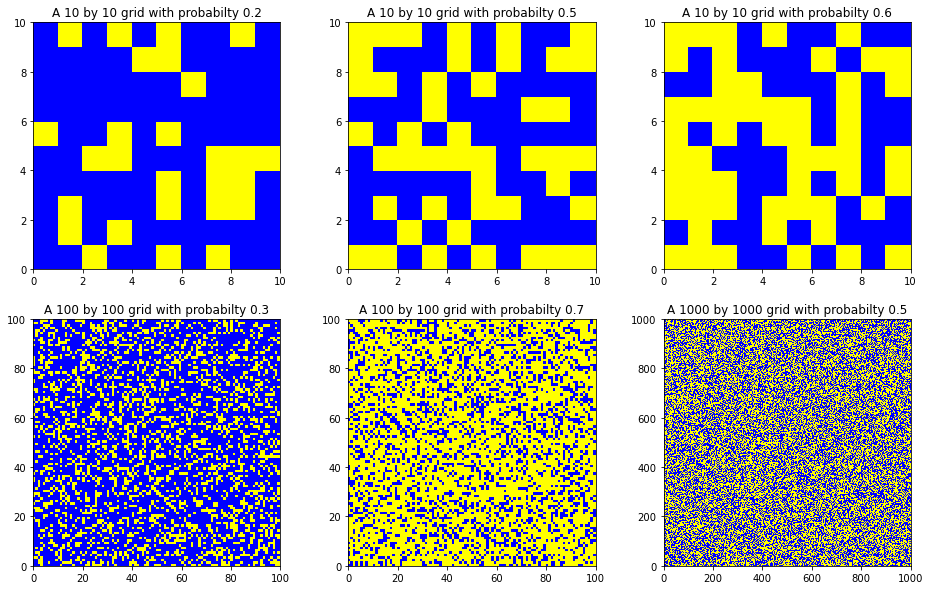

In [3]:
p = [0.2,0.5,0.6,0.3,0.7,0.5]                  # We use a list to store our n and p values to make plotting easier.
n = [10,10,10,100,100,1000]

grids = []                                     # We store our grids in a list so as to use them latter.
for i in range(6):
    grids.append(pr.randomgrid(n[i],p[i]))

plt.figure(figsize = (16,10))
for i in range(6):                             # A for loop makes plotting subplots very efficient.
    plt.subplot(2,3,i+1)
    plt.pcolor(grids[i], cmap = colours)
    plt.title('A {0} by {0} grid with probabilty {1}'.format(n[i],p[i])) # Labelling the grid. 
    plt.axis('square')                         # Creating square axes.
plt.savefig('1.1Plots.pdf')
plt.show()

## 1.2 Finding a yellow path

A site is defined to be reachable if it is yellow and on the left edge of the grid or if it is yellow and there is an adjacent reachable site.
Our function `path_exist` allows us to see if a path exists between the left edge to the right edge of the grid by seeing if there is a reachable site on the right side of the grid. This function also sets the reachable sites to red so we can more easily see if there is a path connecting both sides.

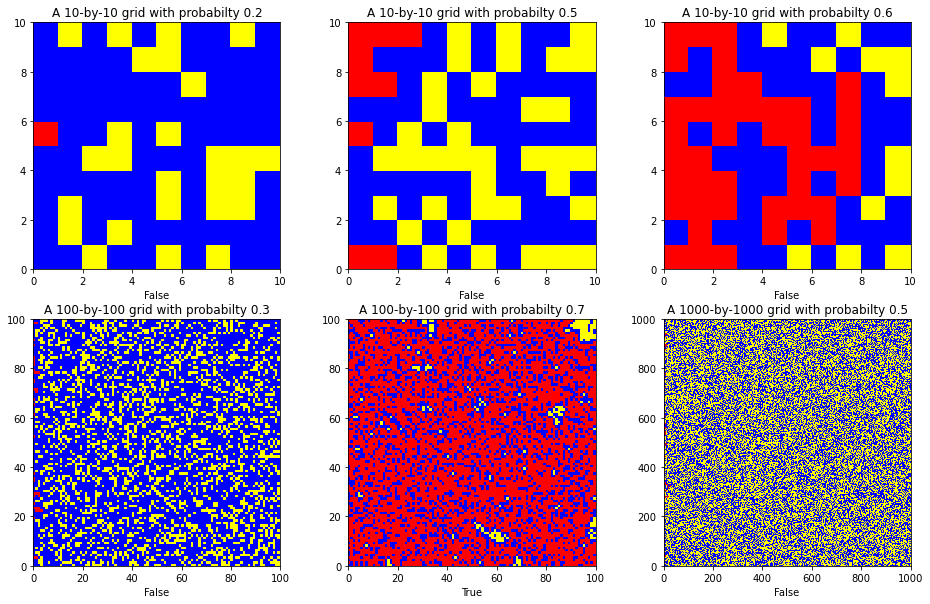

In [4]:
plt.figure(figsize = (16,10))
for i in range(6):
    is_path = pr.path_exist(grids[i])
    plt.subplot(2,3,i+1)
    plt.pcolor(grids[i], cmap = colours)
    plt.title('A {0}-by-{0} grid with probabilty {1}'.format(n[i],p[i]))
    plt.xlabel(is_path)
    plt.axis('square')
plt.savefig('1.2Plots.pdf')
plt.show()

Our function is quick enough for small grids but is slow for bigger, grids especially if there are lots of reachable sites.

We let $F_n(p)=\mathbb{P}($there is a yellow path connecting the left and right sides of an $n$-by-$n$ grid$)$. We do this by importing a module containing functions that allow us to run trials as a way of estimating probabilities:

In [5]:
import probability_estimates as pe

Here we estimate $F_n(p)$ for some small n and some choices of $p$.

In [6]:
n=10
p = [i/10 for i in range(1,10)]
trials = 100

for i in range(len(p)):
    print('For n = {0} and p = {1}, F is roughly '.format(n,p[i]) +str(pe.F(n,p[i],trials)))

For n = 10 and p = 0.1, F is roughly 0.0
For n = 10 and p = 0.2, F is roughly 0.0
For n = 10 and p = 0.3, F is roughly 0.0
For n = 10 and p = 0.4, F is roughly 0.0
For n = 10 and p = 0.5, F is roughly 0.2
For n = 10 and p = 0.6, F is roughly 0.53
For n = 10 and p = 0.7, F is roughly 0.88
For n = 10 and p = 0.8, F is roughly 0.98
For n = 10 and p = 0.9, F is roughly 1.0


## 1.3 Making our function more efficient

Since our previous function checks reachable sites multiple times, we need to find a faster way of seeing if there is a path connecting both sides. Our function `path_exist_efficient` maintains a list of reachable sites and iterates over it in order, examining the adjacent sites, and adding any new reachable sites discovered to the end of the list. It also stops running as soon as it reaches the right edge. This should allow us to work with larger n:

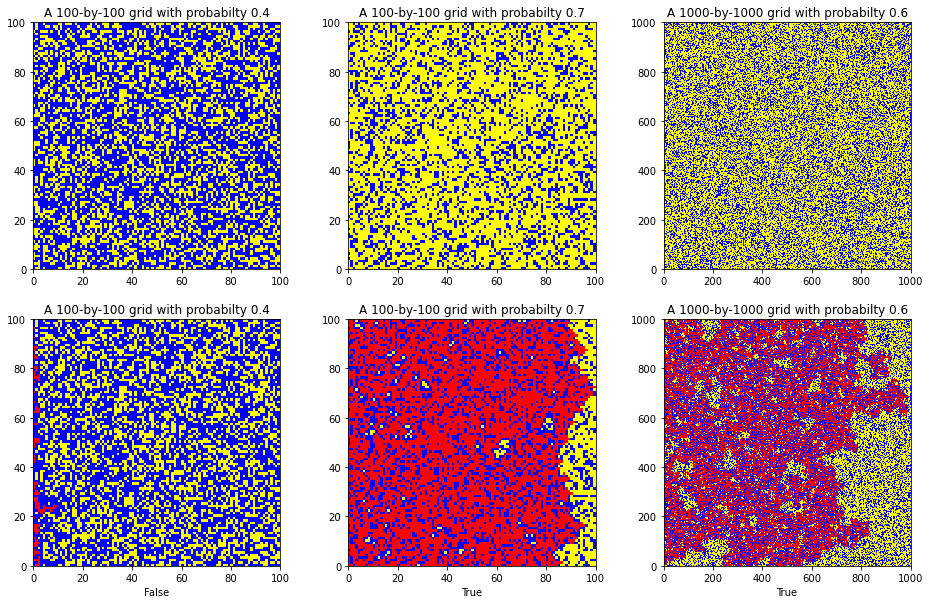

In [7]:
plt.figure(figsize = (16,10))
p = [0.4,0.7,0.6]                             # We use a list to store our n and p values to make plotting easier.
n = [100,100,1000]
grids = []
for i in range(3):
    grids.append(pr.randomgrid(n[i],p[i]))
    plt.subplot(2,3,i+1)
    plt.pcolor(grids[i], cmap = colours)
    plt.title('A {0}-by-{0} grid with probabilty {1}'.format(n[i],p[i]))
    plt.axis('square')

for i in range(3):
    is_path = pr.path_exist_efficient(grids[i])
    plt.subplot(2,3,i+4)
    plt.pcolor(grids[i], cmap = colours)
    plt.title('A {0}-by-{0} grid with probabilty {1}'.format(n[i],p[i]))
    plt.xlabel(is_path)
    plt.axis('square')
plt.savefig('1.3Plots.pdf')
plt.show()

### Comparing our functions using a speed test

In [8]:
p = [0.4,0.6,0.8]                              # We set some n and p values we want to test.
n = [100]
for j in range(len(n)):                        # For loops makes our code cleaner.
    for i in range(len(p)):
        print('Testing for p = {0} and n = {1}'.format(p[i],n[j]))
        print('path_exist')
        %timeit pr.path_exist(pr.randomgrid(n[j],p[i]))
        print('path_exist_efficient')
        %timeit pr.path_exist_efficient(pr.randomgrid(n[j],p[i]))
        print('\n')

Testing for p = 0.4 and n = 100
path_exist
99.1 ms ± 7.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
path_exist_efficient
1.33 ms ± 6.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Testing for p = 0.6 and n = 100
path_exist
1.57 s ± 396 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
path_exist_efficient
6.98 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Testing for p = 0.8 and n = 100
path_exist
909 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
path_exist_efficient
14.7 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)




As we can see from our testing our new function is much quicker.

### Probability for $F_n(p)$ for larger n

We use the same method as before to estimate $F_n(p)$ since we can now compute probabilities for larger n, this time using `F_efficient` (which repeatedly trials `path_exist_efficient` instead of `path_exist`):

In [9]:
n=200
p = [i/10 for i in range(1,10)]
trials = 100

for i in range(len(p)):
    print('For n = {0} and p = {1}, F is roughly '.format(n,p[i]) +str(pe.F_efficient(n,p[i],trials)))

For n = 200 and p = 0.1, F is roughly 0.0
For n = 200 and p = 0.2, F is roughly 0.0
For n = 200 and p = 0.3, F is roughly 0.0
For n = 200 and p = 0.4, F is roughly 0.0
For n = 200 and p = 0.5, F is roughly 0.0
For n = 200 and p = 0.6, F is roughly 0.83
For n = 200 and p = 0.7, F is roughly 1.0
For n = 200 and p = 0.8, F is roughly 1.0
For n = 200 and p = 0.9, F is roughly 1.0


## 1.4 Graphs of Fn(p) and the critical point

Now we want to investigate the limit $F(p)=lim_{n\to\infty}F_n(p)$ which is zero if $p<p_c$ and one otherwise, where $p_c$ is called the critical point.

We plot graphs of $F_n(p)$ as a function of $p$ for several values of $n$ to try and estimate $p_c$ the critical point.

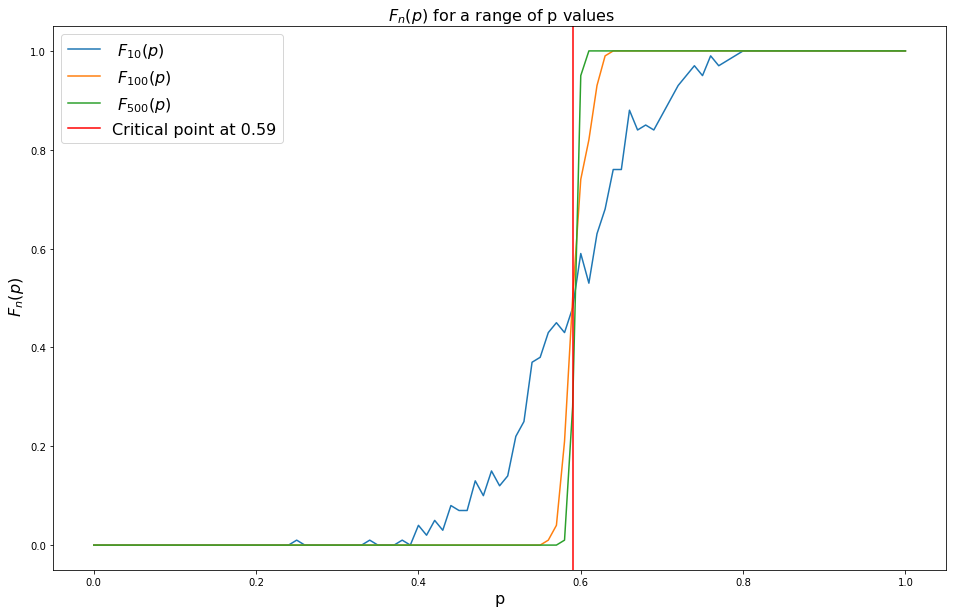

In [10]:
n = [10,100,500]                               # Some values of n.
trials = 100
p = np.arange(0,1+1/trials,1/trials)

Fvals = [[] for j in range(len(n))]            # An empty list to store our F values.

plt.figure(figsize = (16,10))                  # Plotting the graph
fontsize = 16
for j in range(len(n)):                        # Here we fill F values and plot them.
    Fvals[j] = [pe.F_efficient(n[j],p[i],trials) for i in range(len(p))]
    plt.plot(p,Fvals[j], label = r'$\ F_{}(p)$'.format({n[j]}))

pc = 0.59                                      # A conjectured critical point.
plt.axvline(x = pc, label = 'Critical point at '+str(pc) , c = "red")        # Vertical line at pc on the graph.
plt.title(r'$\ F_{n}(p)$' + ' for a range of p values', fontsize = fontsize) # Labelling the graph.
plt.xlabel('p',fontsize = fontsize)                                          # Labelling the x-axis.
plt.ylabel(r'$\ F_{n}(p)$',fontsize = fontsize)                              # Labelling the y-axis.
plt.legend(fontsize = fontsize)                # Legend for the graph.
plt.savefig('1.4Plot1.pdf')
plt.show()

This gives a more zoomed in plot of $F_{500}(p)$ to get a more precise estimate of $p_c$.

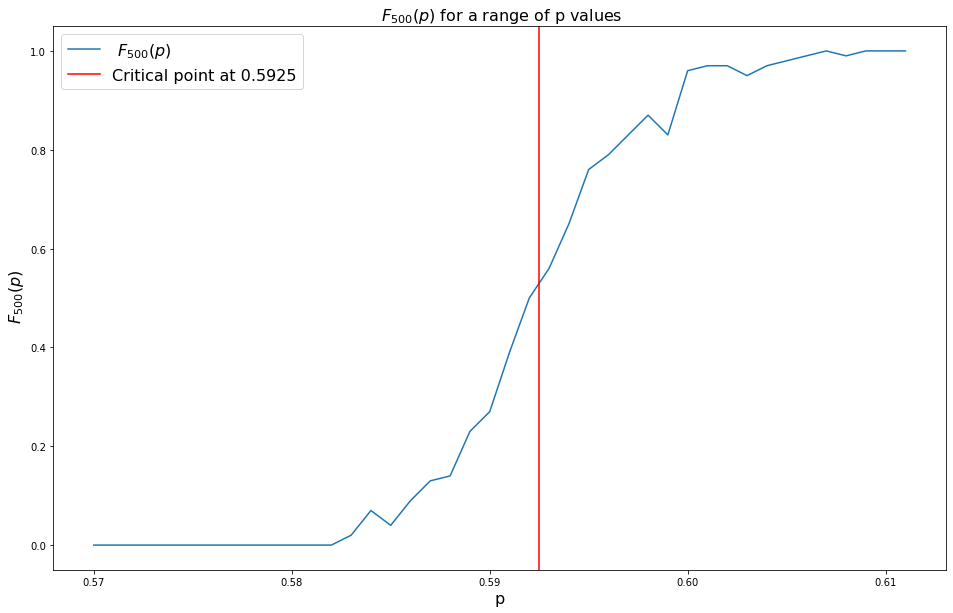

In [11]:
n = 500
delta = 0.001
p = np.arange(0.57,0.61+delta,delta)
trials = 100

Fvals = [pe.F_efficient(n,p[i],trials) for i in range(len(p))]

pc = 0.5925                                    # Our conjectured critical point.
plt.figure(figsize = (16,10))
fontsize = 16
plt.plot(p,Fvals, label = r'$\ F_{500}(p)$')   #Plotting the graph
plt.title(r'$\ F_{500}(p) $'+ ' for a range of p values', fontsize = fontsize) # Labelling the graph.
plt.xlabel('p', fontsize = fontsize)                                           # Labelling the x-axis.
plt.ylabel(r'$\ F_{500}(p) $', fontsize = fontsize)                            # Labelling the y-axis.
plt.axvline(x = pc , label = 'Critical point at '+str(pc) , c = "red")         # Vertical line on the graph at pc.
plt.legend(fontsize = fontsize)                # Legend for the graph.
plt.savefig('1.4Plot2.pdf')
plt.show()

## 1.5 Investigating a path from the center to the boundary

Now instead of investigating the probability that there is a yellow path connecting the left side to the right we look into:

$G_n(p)=\mathbb{P}$(there is a yellow path connecting the centre of the $n$-by-$n$ grid to the boundary).

### Visualising some plots

We now look at some plots after the random grids have been passed through our `path_exist_from_centre` function

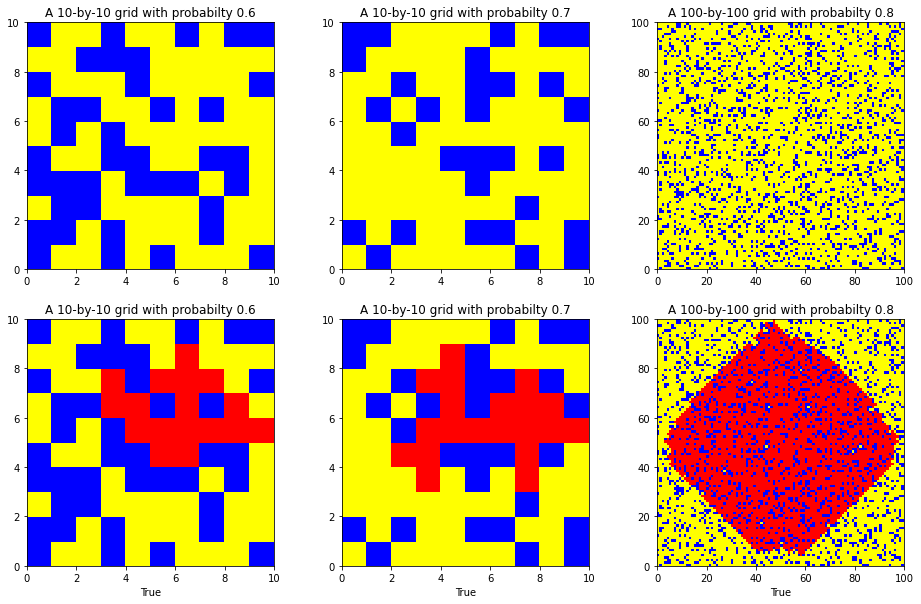

In [12]:
plt.figure(figsize = (16,10))
p = [0.6,0.7,0.8]                  # We use a list to store our n and p values to make plotting easier.
n = [10,10,100]
grids = []
for i in range(3):
    grids.append(pr.randomgrid(n[i],p[i]))
    plt.subplot(2,3,i+1)
    plt.pcolor(grids[i], cmap = colours)
    plt.title('A {0}-by-{0} grid with probabilty {1}'.format(n[i],p[i]))
    plt.axis('square')

for i in range(3):
    is_path = pr.path_exist_from_center(grids[i])
    plt.subplot(2,3,i+4)
    plt.pcolor(grids[i], cmap = colours)
    plt.title('A {0}-by-{0} grid with probabilty {1}'.format(n[i],p[i]))
    plt.xlabel(is_path)
    plt.axis('square')
plt.savefig('1.5Plots1.pdf')
plt.show()

### Estimating the critical point of $G_n(p)$

We now use the same method as we did for $F_n(p)$ to find the critcal point of $G_n(p)$:

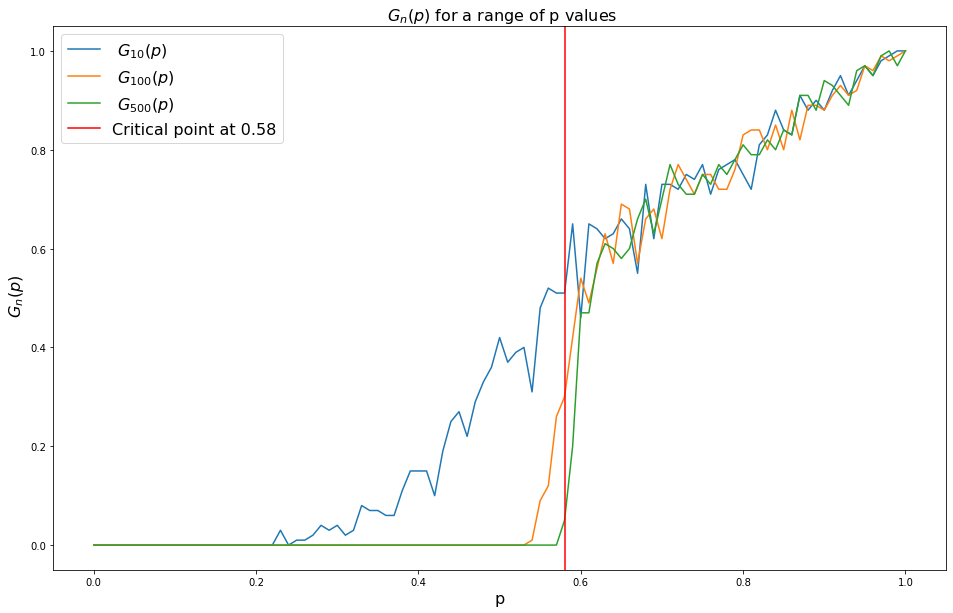

In [13]:
n = [10,100,500]
trials = 100
p = np.arange(0,1+1/trials,1/trials)

Gvals = []

plt.figure(figsize = (16,10))
fontsize = 16
for j in range(len(n)):
    Gvals.append([pe.G(n[j],p[i],trials) for i in range(len(p))])
    plt.plot(p,Gvals[j], label = r'$\ G_{}(p)$'.format({n[j]}))

pc = 0.58                                      # A conjectured critical point
plt.axvline(x = pc, label = 'Critical point at '+str(pc) , c = "red")
plt.title(r'$\ G_{n}(p)$' + ' for a range of p values', fontsize = fontsize)
plt.xlabel('p',fontsize = fontsize)
plt.ylabel(r'$\ G_{n}(p)$',fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.savefig('1.5Plot2.pdf')
plt.show()

# 2: Rectangular Lattices

## 2.1 Plotting grids different rectangular grids

We want to investigate rectangular grids of different shapes in the same way we did for square grids. We can test probabilities for $2n$-by-$n$ and $3n$-by-$2n$ rectangular grids by using randomgridrect, which works very similarly to our randomgrid function,

We start by plotting some example rectangles:

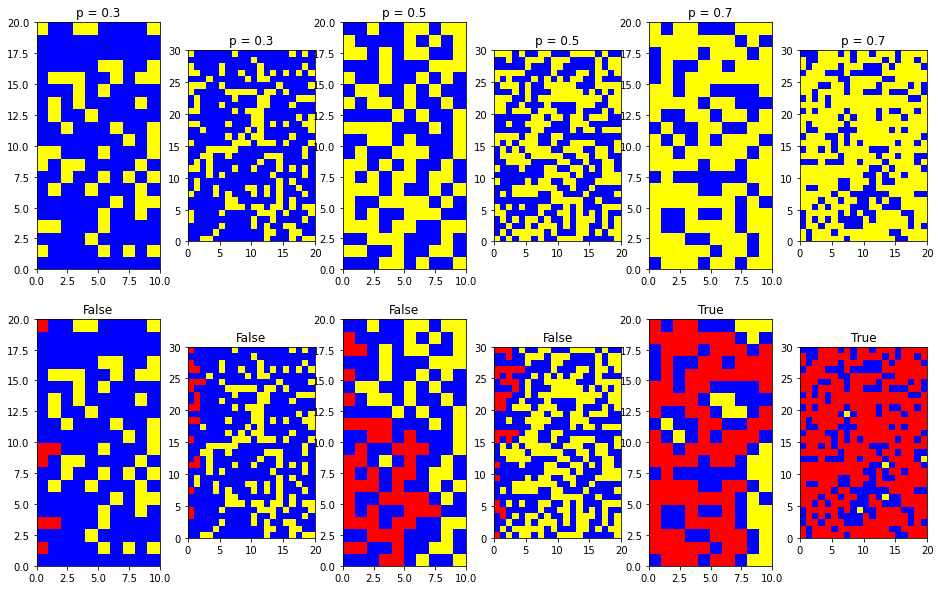

In [14]:
n = [10]
p = [0.3,0.5,0.7]

rectangles = []
for i in range(len(n)):
    for j in range(len(p)):
        rectangles.append(pr.randomgridrect(2*n[i],n[i],p[j]))
        rectangles.append(pr.randomgridrect(3*n[i],2*n[i],p[j]))

plt.figure(figsize = (16,10))
for i in range(len(rectangles)):
    plt.subplot(2,6,i+1)
    plt.pcolor(rectangles[i], cmap = colours)
    plt.title('p = {}'.format(p[i//2]))
    axes=plt.gca()
    axes.set_aspect(1)
    
    is_path = pr.path_exist(rectangles[i])
    plt.subplot(2,6,i+len(rectangles)+1)
    plt.pcolor(rectangles[i], cmap = colours)
    plt.title(is_path)
    axes=plt.gca()
    axes.set_aspect(1)
plt.savefig('2.1Plots.pdf')
plt.show()

## 2.2 Graphs of $F_n(p)$ and estimating the critical point $p_c$

We now use our `F_rect` function to work for $n$-by-$m$ rectangles, so that we can, in the same way we did for the square, estimate the critical point.

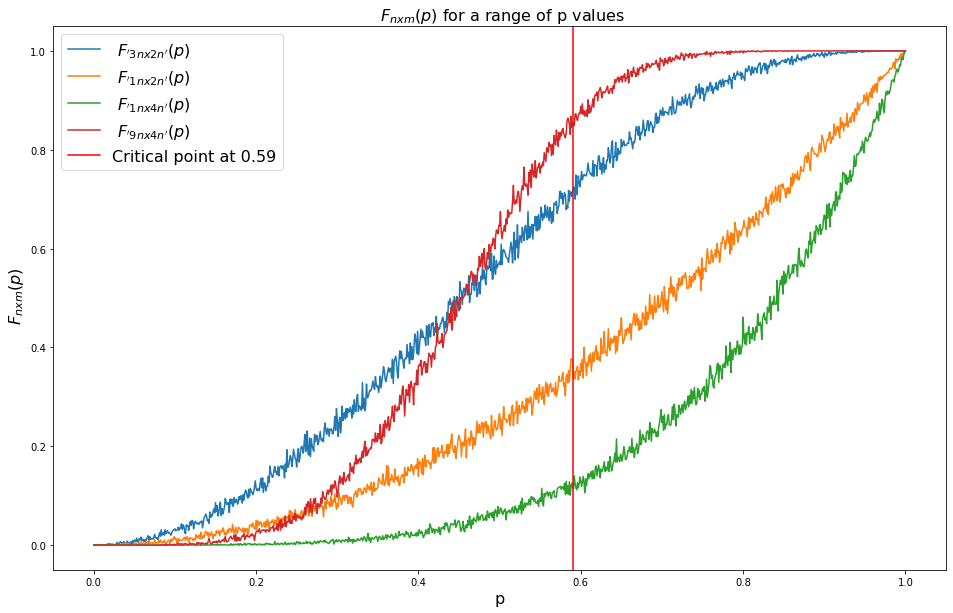

In [15]:
n = 800
shape = [(3,2),(1,2),(1,4),(9,4)]
trials = 1000
p = np.arange(0,1+1/trials,1/trials)

plt.figure(figsize = (16,10))
for i in range(len(shape)):
    plt.plot(p,[pe.F_rect(shape[i][0],shape[i][1],p[j],trials) for j in range(len(p))], 
             label = r'$\ F_{}(p)$'.format({str(shape[i][0])+'n'+'x'+str(shape[i][1])+'n'}))

fontsize = 16
pc = 0.59                                      # A conjectured critical point
plt.axvline(x = pc, label = 'Critical point at '+str(pc) , c = "red")
plt.title(r'$\ F_{nxm}(p)$' + ' for a range of p values', fontsize = fontsize)
plt.xlabel('p',fontsize = fontsize)
plt.ylabel(r'$\ F_{nxm}(p)$',fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.savefig('2.2Plot.pdf')
plt.show()

# 3: Triangular Lattices

We refer to the first 4 core exercises and do the same for the triangular lattice which consists of sites at the corners of equilateral triangles, with 6 triangles meeting at each site. 
We will implement this as a square grid and cut the square in half from the bottom left corner to the top right corner. We then use our `triangular_position` function to transform our half grid to an equilateral triangular lattice on a pair of axes.

First we need to import the `percolation_triangular` module, which contains useful functions in analysing and modifying our triangular lattice.

In [16]:
import percolation_triangular as pt

## 3.1 Plotting triangular lattices

We start by trying to find a path from the left corner of our square grid to the right edge using the function `path_exist_triangular`. One way to do this is by simply making a `pcolor` plot of the grid: 

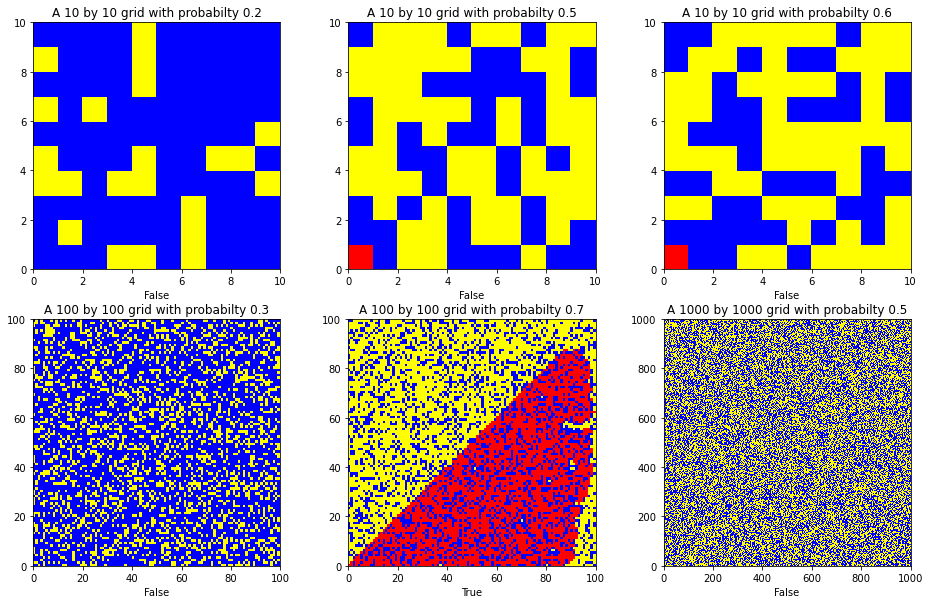

In [17]:
p = [0.2,0.5,0.6,0.3,0.7,0.5]                  # We use a list to store our n and p values to make plotting easier.
n = [10,10,10,100,100,1000]

grids = []                                     # We store our grids in a list so as to use them later.
for i in range(6):
    grids.append(pr.randomgrid(n[i],p[i]))

    
plt.figure(figsize = (16,10))
for i in range(6):
    is_path=pt.path_exist_triangular(grids[i])
    plt.subplot(2,3,i+1)
    plt.pcolor(grids[i], cmap = colours)
    plt.xlabel(is_path)
    plt.title('A {0} by {0} grid with probabilty {1}'.format(n[i],p[i]))
    plt.axis('square')
plt.savefig('3.1Plots1.pdf')
plt.show()

This way of showing our triangular lattice is not very clear or easy to read so we can use `random_triangular_lattice` which returns creates a grid as above, but also the $(x,y)$ co-ordinates of each site in the lattice. Then `print_equilateral_triangle` allows us to show this on a pair of axes.

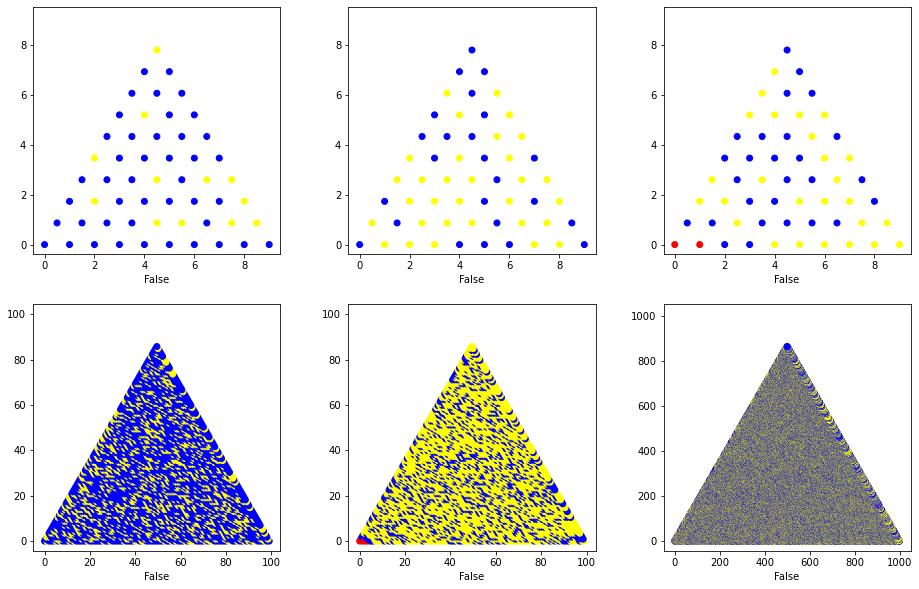

In [18]:
p = [0.2,0.5,0.6,0.3,0.7,0.5]                  # We use a list to store our n and p values to make plotting easier.
n = [10,10,10,100,100,1000]

grids = []                                     # We store our grids in a list so as to use them later.
for i in range(6):
    grids.append(pt.random_triangular_lattice(n[i],p[i]))

    
plt.figure(figsize = (16,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    is_path = pt.path_exist_triangular(grids[i][1])
    plt.xlabel(is_path)
    #plt.title('A triangle lattice with sides length {0} and r = {1}'.format(n[i],r[i]))

    pt.print_equilateral_triangle(grids[i])
plt.savefig('3.1Plots2.pdf')
plt.show()

This is a much better way of visualising our triangle and makes it easier for us to see if there is a path.

## 3.2 Graphs of $F_n(p)$ and estimating the critical point $p_c$

Similarly to the square and rectangle cases, we can use `F_tri` to estimate $F_n(p)$ in a triangular lattice. We then plot a graph and estimate the critical point:

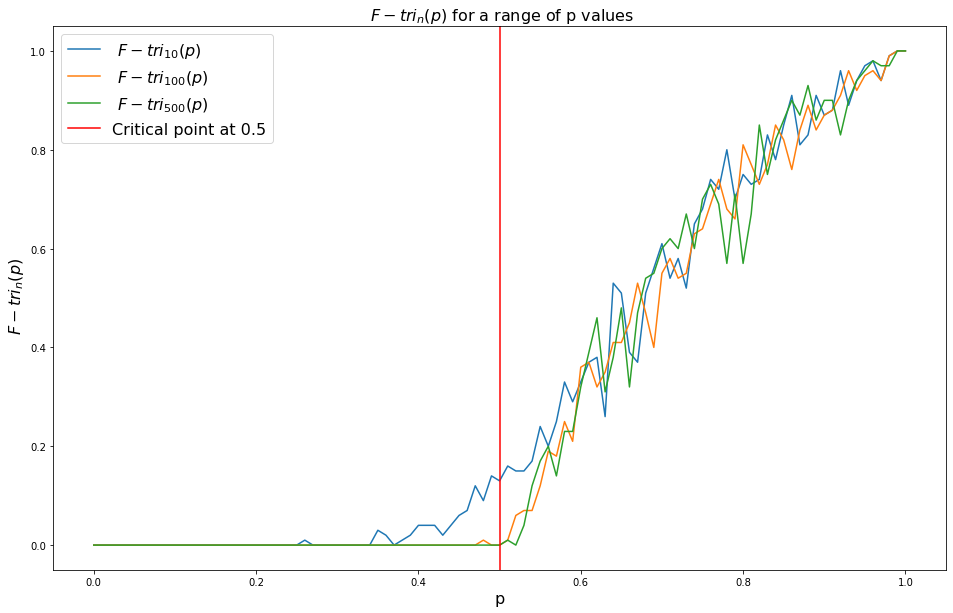

In [19]:
n = [10,100,500]
trials = 100
p = np.arange(0,1+1/trials,1/trials)

Tvals = []

plt.figure(figsize = (16,10))
fontsize = 16
for j in range(len(n)):
    Tvals.append([pe.F_tri(n[j],p[i],trials) for i in range(len(p))])
    plt.plot(p,Tvals[j], label = r'$\ F-tri_{}(p)$'.format({n[j]}))

pc = 0.50                                      # A conjectured critical point
plt.axvline(x = pc, label = 'Critical point at '+str(pc) , c = "red")
plt.title(r'$\ F-tri_{n}(p)$' + ' for a range of p values', fontsize = fontsize)
plt.xlabel('p',fontsize = fontsize)
plt.ylabel(r'$\ F-tri_{n}(p)$',fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.savefig('3.2Plot.pdf')
plt.show()

## 3.3 Investigating the behaviour of $G_{n}$ on a triangular lattice

An interesting property of $G$ is that it has an asymptotic power law behaviour near $p_c$, i.e.
$$G(p_c + \epsilon) \approx \epsilon^\beta.$$

Taking logs on both sides such that log(G($p_c+\epsilon$)) $\approx$ $\beta$ log $\epsilon$. 
We continue by plotting log(G($p_c+\epsilon$)) against log $\epsilon$, and then calculating the gradient. The gradient we find will be the value of $\beta$. Using the critical point from question 7, p=1/2, we can calculate $\epsilon$ using $\epsilon$ = p - $p_c$. We can choose values of p greater than 0.5 since $p_c = 0.5$.

In [20]:
log_epsilon=np.log(np.arange(0.55,0.65,0.01)-0.5)  # Taking log of epsilon for p values of 0.55 to 0.65
log_G=np.log(np.arange(0.55,0.65,0.01))            # Taking log of G for p values of 0.55 to 0.65

gradient=(log_G[4]-log_G[2])/(log_epsilon[4]-log_epsilon[2])
print('gradient = ' +str(gradient))                # This is the value of beta.

gradient = 0.13722322393930556


Plotting the graph on a log-log scale, we can find and approximate a value for $\beta$ by calculating the gradient.

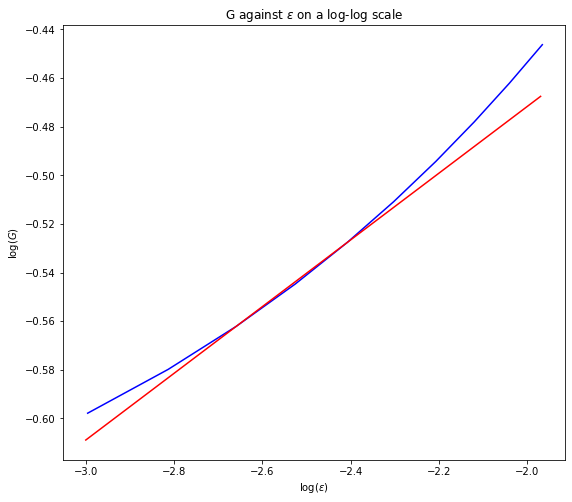

In [21]:
plt.figure(figsize=(9, 8))
plt.plot(log_epsilon,log_G,color='b')

plt.xlabel('$\log(\epsilon)$')                     # Labelling our graph.
plt.ylabel('$\log(G)$')
plt.title('G against $\epsilon$ on a log-log scale')
x = np.arange(-3,-1.96,0.01)                       # Plotting a straight line.
y = ((log_G[4]-log_G[2])/(log_epsilon[4]-log_epsilon[2]))*(x - log_epsilon[2]) + log_G[2]
plt.plot(x,y, color = 'r')
plt.savefig('3.3Plot.pdf')
plt.show()

The value of $\beta$ turned out to be $0.137$ which is a good approximation as the exact value of $\beta$ is $\frac{5}{36} \approx 0.138$.

## 3.4 Another type of path

Lastly we will look at paths connecting the base of the triangle to the top $rn$ length of the right edge of the triangle, where $0<r<1$, although we will only consider $p=p_c=0.5$. 

### Visualising our path

To see the type of path we're looking at, we can plot some examples:

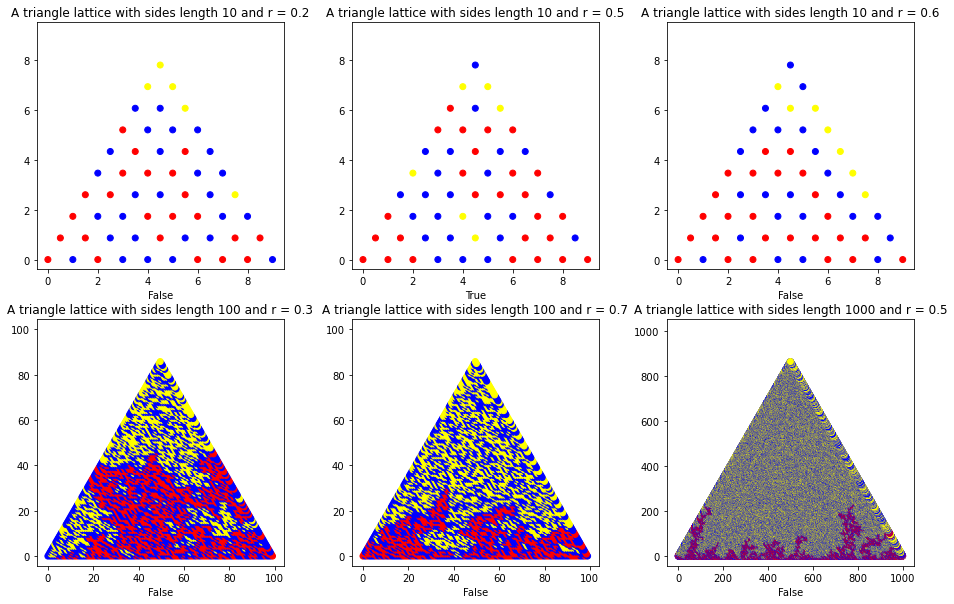

In [22]:
r = [0.2,0.5,0.6,0.3,0.7,0.5]                  # We use a list to store our n and p values to make plotting easier.
n = [10,10,10,100,100,1000]

grids = []                                     # We store our grids in a list so as to use them later.
for i in range(6):
    grids.append(pt.random_triangular_lattice(n[i],0.5))

    
plt.figure(figsize = (16,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title('A triangle lattice with sides length {0} and r = {1}'.format(n[i],r[i]))
    is_path = pt.path_exist_from_base(grids[i][1], r[i])
    plt.xlabel(is_path)

    pt.print_equilateral_triangle(grids[i])
plt.savefig('3.4Plots1.pdf')
plt.show()

### Estimating $T_n(r)$ and finding it's limit

We define a new probability $T_n(r)$ as $T_n(r) = \mathbb{P}$(there is a yellow path connecting the base of the triangle to the top $rn$ length of the right edge). We can estimate this using `T_equilateral(n, r, trials)` from our `probability_estimates` module

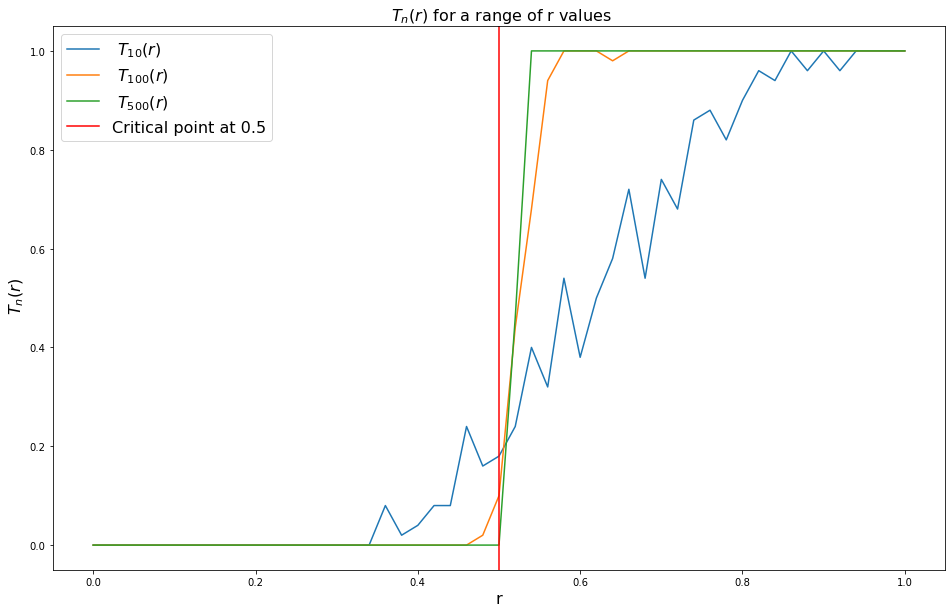

In [23]:
n = [10,100,500]
trials = 50
r = np.arange(0,1+1/trials,1/trials)

Tvals = []

plt.figure(figsize = (16,10))
fontsize = 16
for j in range(len(n)):
    Tvals.append([pe.T_equilateral(n[j],r[i],trials) for i in range(len(r))])
    plt.plot(r,Tvals[j], label = r'$\ T_{}(r)$'.format({n[j]}))

pc = 0.50                                     # A conjectured critical point
plt.axvline(x = pc, label = 'Critical point at '+str(pc) , c = "red")
plt.title(r'$\ T_{n}(r)$' + ' for a range of r values', fontsize = fontsize)
plt.xlabel('r',fontsize = fontsize)
plt.ylabel(r'$\ T_{n}(r)$',fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.savefig('3.4Plot2.pdf')
plt.show()

# 4: A different way of estimating our critical point $p_c$

In this we effectively sample all values of $p$ simultaneously. Each site is assigned an independent Uniform$[0,1]$ random variable. The model with parameter $p$ is then defined by declaring all those sites with label less than p yellow. We can compute the minimum $p$ for which a yellow path connecting the regions of interest exists.

First we need to import functions from the `percolation_criticalpoint` module.

In [24]:
import percolation_criticalpoint as cp

Using our functions to estimate various critical points to compare it to the critical points we found from our graphs.

In [25]:
n = 200
trials = 100

print('The critical point for a square grid is:')
print(cp.critical_point(n,n,trials,pr.path_exist_efficient))
print('\n')
print('The critical point for a 2n-by-n rectangle is:')
print(cp.critical_point(2*n,n,trials,pr.path_exist_efficient))
print('\n')
print('The critical point for a square grid for a path from the center to the boundary is:')
print(cp.critical_point(n,n,trials,pr.path_exist_from_center))
print('\n')
print('The critical point for a triangular grid is:')
print(cp.critical_point(n,n,trials,pt.path_exist_triangular))

The critical point for a square grid is:
0.5943599999999999


The critical point for a 2n-by-n rectangle is:
0.58738


The critical point for a square grid for a path from the center to the boundary is:
0.6678100000000002


The critical point for a triangular grid is:
0.70282


These critical points agree with the critical points we got from our graphs.

In [28]:
!!jupyter nbconvert *.ipynb --to html

['[NbConvertApp] Converting notebook Percolation.ipynb to html',
 '[NbConvertApp] Writing 2262029 bytes to Percolation.html']

# Conclusion

In this project we managed to analyse the topic of percolation in depth. We worked with different shapes and worked out probabilities of an existing path, plotted graphs and estimated critical points while investigating the limit n as it approaches infinity. 

In the first section of our project we created a square grid of $n$x$n$ diamensions. We plotted it many times and we found the probability of finding a yellow path, from the left side to the right side. We then tried figuring out if there exists a path from the center of the square grid to any side, either up, down, right or left. We also found the critical point of the square grid to be 0.59. 

In section 2, we did the same process but now for a rectangular grid, for diamensions 3n-by-2n, n-by-2n, n-by-4n and 9n-by-4n. We worked out the probability of finding a yellow path from left side to the right side and its critical point which was exactly the same as the square grid (0.59). 

Section 3 shows how we used a triangular lattice where we implemented it as a square grid and cut the square in half from the top left corner to the bottom right corner. We try and find a yellow path from the top left corner to the right boundary, and then we estimated the critical point to be 0.50. Further on, we were given that for the triangular lattice, G has an asymptotic power law behaviour near pc, and by taking logs and plotting a log-log scale we estimated the power $\beta$ to be 0.137 which is a quite accurate approximation. We then took the parameter to be exactly $p = p_c$, for question 10, and investigated the probability $Tn(r)$ that the base of the triangle is connected by a yellow path to the right side within distance rn of the top vertex.